# Introduction to Data Science - Homework 3
*COMP 5369 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: Friday, February 2, 11:59pm.

In this homework you will read in and analyze a movies dataset. First we'll do some basic analysis with vanilla Python, then we'll move on to doing more advanced analysis with [Pandas](http://pandas.pydata.org/pandas-docs/stable). 

## Your Data
Fill out the following information: 

*First Name:*   Brooke <br>
*Last Name:*   Stanislawski <br>
*E-mail:*   brooke.stanislawski@utah.edu <br>
*UID:*  u1142223 <br>


## Part 1: Analyzing Data The Hard Way

In this part we'll do some manual analysis of a movies dataset.

### Task 1.1: Read in the data

Parse the file [movies.csv](movies.csv) using the [csv library](https://docs.python.org/3/library/csv.html). Lecture 6 and/or Homework 2 might be a good inspiration for this. 

We recommend that you store the header in a separate array. Make sure that at least the "ratings" and the "votes" columns are cast to the appropriate data types for doing calculations with them. 

Print the header, a row of the table, and the number of rows and columns.

In [1]:
# import the csv library
import csv

# initialize the top-level array
movies = []
header = []

with open('movies.csv') as csvfile:
    movies_file = csv.reader(csvfile, delimiter=',') #, quotechar='|')
    for row in movies_file:
        movies.append(row) #(row.split(","))
        
header = movies.pop(0)

for row in movies:
    row[5] = float(row[5]) #cast ratings to float
    row[6] = int(row[6]) #cast votes to int

print("header:",header,"\n")
print("movies:",movies[0],"\n")
print("number of rows:", len(movies),"  number of columns:",len(movies[1]),"\n") 
#print("data type of ratings:",type(movies[0][5]))
#print("data type of votes:",type(movies[0][6]))

## should the number of rows and columns include the header??

header: ['', 'title', 'year', 'length', 'budget', 'rating', 'votes', 'r1', 'r2', 'r3', 'r4', 'r5', 'r6', 'r7', 'r8', 'r9', 'r10', 'mpaa', 'Action', 'Animation', 'Comedy', 'Drama', 'Documentary', 'Romance', 'Short'] 

movies: ['1', '$', '1971', '121', 'NA', 6.4, 348, '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '14.5', '4.5', '4.5', '', '0', '0', '1', '1', '0', '0', '0'] 

number of rows: 58788   number of columns: 25 



### Task 1.2:  Calculate movie stats

In this task, you will calculate some statistics about movies. We suggest you implement your solutions for Tasks 1.2.1-1.2.3 in one code cell - you should be able to calculate this in a single iteration over the dataset.

#### Task 1.2.1 Calcualte average ratings
Compute the average rating for the movies and print the output. Also print the number of movies.
Your output could look like this:
    
    Average rating: xxx.xxxx, Number of movies: xx

#### Task 1.2.2: Calculate average rating for major movies

Compute the average rating for the movies that have more than 500 votes in your loaded dataset and print the output. (We'll call these movies with more than 500 votes *major movies* from now on).

Your output could look like this:
    
    Average rating of movies with more than 500 votes: xxx.xxxx, Number of major movies: xx

#### Task 1.2.3: Find the highest rated major movie

Find out which of the movies with more than 500 votes has the highest rating.

Your output could look like this:
    
    Highest rating: xxx.xxxx, Title: MOVIE TITLE
 
#### Task 1.2.4: Interpret the data
 * What's the size relationship of major movies to all movies?
 * Are major movies usually better than the average movies?

In [2]:
# your code goes here

def avg_rating(movies_matrix):
    sum_ratings = 0
    for i in range(len(movies_matrix)):
        sum_ratings += movies_matrix[i][5] #ratings is in column index 5
    return sum_ratings / len(movies_matrix)

def mm_avg_rating(movies_matrix):
    sum_ratings = 0
    mm_count = 0
    for i in range(len(movies_matrix)):
        if movies_matrix[i][6] > 500:
            sum_ratings += movies_matrix[i][5] #ratings is in column index 5
            mm_count += 1
    return [sum_ratings / mm_count, mm_count]

def top_rated(movies_matrix):
    top_rating = movies_matrix[0][5]
    for i in range(len(movies_matrix)):
        if movies_matrix[i][6] > 500:
            if movies_matrix[i][5] > top_rating:
                top_rated = movies_matrix[i][1]
                top_rating = movies_matrix[i][5]
    return [top_rating, top_rated]

avg_rating = avg_rating(movies) # Task 1.2.1
mm_avg_rating = mm_avg_rating(movies) # Task 1.2.2
top_rated = top_rated(movies) # Task 1.2.3
    
print("Average rating: " + str(avg_rating) + ", Number of movies: " + str(len(movies)))
print("Average rating of movies with more than 500 votes: " + str(mm_avg_rating[0]) + ", Number of major movies: " + str(mm_avg_rating[1]))
# check HW2 solutions for 'count' above
print("Highest rating: " + str(top_rated[0]) + ", Title: " + str(top_rated[1]))
print("\n")

print("movies:",movies[0:5],"\n")

#should we be using functions?
#vanilla Python means no numpy functions, right? everything manual?

Average rating: 5.932850241545932, Number of movies: 58788
Average rating of movies with more than 500 votes: 6.370579126664578, Number of major movies: 6458
Highest rating: 9.1, Title: Godfather, The


movies: [['1', '$', '1971', '121', 'NA', 6.4, 348, '4.5', '4.5', '4.5', '4.5', '14.5', '24.5', '24.5', '14.5', '4.5', '4.5', '', '0', '0', '1', '1', '0', '0', '0'], ['2', '$1000 a Touchdown', '1939', '71', 'NA', 6.0, 20, '0', '14.5', '4.5', '24.5', '14.5', '14.5', '14.5', '4.5', '4.5', '14.5', '', '0', '0', '1', '0', '0', '0', '0'], ['3', '$21 a Day Once a Month', '1941', '7', 'NA', 8.2, 5, '0', '0', '0', '0', '0', '24.5', '0', '44.5', '24.5', '24.5', '', '0', '1', '0', '0', '0', '0', '1'], ['4', '$40,000', '1996', '70', 'NA', 8.2, 6, '14.5', '0', '0', '0', '0', '0', '0', '0', '34.5', '45.5', '', '0', '0', '1', '0', '0', '0', '0'], ['5', '$50,000 Climax Show, The', '1975', '71', 'NA', 3.4, 17, '24.5', '4.5', '0', '14.5', '14.5', '4.5', '0', '0', '0', '24.5', '', '0', '0', '0', '0', '0',

In [3]:
print(6458/58788) #for interpretation

0.10985235081989522


**Your Interpretation**: Only 11% of all movies are considered major movies (they have over 500 votes).  Of those major movies, the average rating is 6.37 whereas the average rating of all movies is 5.93.  Thus, major movies or usually better than the average movies.

## Part 2: Pandas

In this part we will use the [Pandas library](http://pandas.pydata.org/pandas-docs/stable) for our analysis.

### Task 2.1: Loading data

Read in the data again. This time you should create a [Pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). Print the head of the dataset. 
 * How many data rows did you load? How many columns?
 * Of which data types are the columns? 
 * Do you have to do manual data type conversions?

In [4]:
# import pansas and numpy
import pandas as pd

# your code goes here
movies_csv = pd.read_csv("movies.csv")
pdmovies = pd.DataFrame(movies_csv)

In [5]:
pdmovies.head()

,Unnamed: 0,title,year,length,budget,rating,votes,r1,r2,r3,...,r9,r10,mpaa,Action,Animation,Comedy,Drama,Documentary,Romance,Short
0,1,$,1971,121,NaN,6.4,348,4.5,4.5,4.5,...,4.5,4.5,NaN,0,0,1,1,0,0,0
1,2,$1000 a Touchdown,1939,71,NaN,6.0,20,0.0,14.5,4.5,...,4.5,14.5,NaN,0,0,1,0,0,0,0
2,3,$21 a Day Once a Month,1941,7,NaN,8.2,5,0.0,0.0,0.0,...,24.5,24.5,NaN,0,1,0,0,0,0,1
3,4,"$40,000",1996,70,NaN,8.2,6,14.5,0.0,0.0,...,34.5,45.5,NaN,0,0,1,0,0,0,0
4,5,"$50,000 Climax Show, The",1975,71,NaN,3.4,17,24.5,4.5,0.0,...,0.0,24.5,NaN,0,0,0,0,0,0,0


In [6]:
# print data types
print("Number of rows loaded = " + str(pdmovies.shape[0]) + ", Number of columns loaded = " + str(pdmovies.shape[1]) + "\n")
pdmovies.info()

Number of rows loaded = 58788, Number of columns loaded = 25

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58788 entries, 0 to 58787
Data columns (total 25 columns):
Unnamed: 0     58788 non-null int64
title          58788 non-null object
year           58788 non-null int64
length         58788 non-null int64
budget         5215 non-null float64
rating         58788 non-null float64
votes          58788 non-null int64
r1             58788 non-null float64
r2             58788 non-null float64
r3             58788 non-null float64
r4             58788 non-null float64
r5             58788 non-null float64
r6             58788 non-null float64
r7             58788 non-null float64
r8             58788 non-null float64
r9             58788 non-null float64
r10            58788 non-null float64
mpaa           4924 non-null object
Action         58788 non-null int64
Animation      58788 non-null int64
Comedy         58788 non-null int64
Drama          58788 non-null int64
Documentary  

**Your Interpretation**: With the first line of code, I loaded 58788 rows and 25 columns of data.  The data types can be seen in the output of movies.info() above.  For example, the data type of the 'title' column is object, the data type of the 'year' column is int64.  Manual data type conversion is not needed because the ratings are float64 type and the votes are int64 type.  The data type conversion was done automatically by the panda read_csv function.

### Task 2.2: Calculate the average rating

Compute the average rating for all movies and print the output in a formatted way.

Your output could look like this:
    
    Average rating: xxx.xxxx

In [7]:
# your code goes here
print("Average rating: " + str(pdmovies["rating"].mean()))

Average rating: 5.932850241545932


### Task 2.3: Compare the runtime

Measure the runtime of the mean calculation using [Pandas](http://pandas.pydata.org/pandas-docs/stable) and compare it to the computation time for calculating the mean using a for loop (you can copy the relevant parts from part one).

You can use [time.clock()](https://docs.python.org/3/library/time.html) to set timestamps before and after the execution of the code you want to measure, then you simply substract end time from start time.

Print your results in a human readable way and add a metric to the output. Calculate the factor of the difference and print it. Note that the exact times and the factors will vary when you re-run this and especially between machines. 

E.g.:  
    time using own code: xxx.xxx s  
    time using Pandas: xxx.xxx s  
    difference factor: xxx

In [8]:
import time
# your code goes here

def avg_rating(movies_matrix):
    sum_ratings = 0
    for i in range(len(movies_matrix)):
        sum_ratings += movies_matrix[i][5] #ratings is in column index 5
    return sum_ratings / len(movies_matrix)

start = time.clock()
#avg_rating(movies)
avg_rating = avg_rating(movies)
end = time.clock()
own_diff = end-start
print("time using own code: " + str(own_diff) + " s")

start = time.clock()
pdmovies["rating"].mean()
end = time.clock()
pd_diff = end-start
print("time using Pandas: " + str(pd_diff) + " s")

print("difference factor: " + str((pd_diff-own_diff)/pd_diff) + "%")

time using own code: 0.016942194413537334 s
time using Pandas: 0.0006369246020126798 s
difference factor: -25.60000000000008%


### Task 2.4: Filter out rows

The whole movies dataset has about 60k entries. Use pandas to filter your dataframe to contain only the major movies with more than 500 votes.

Count and print the number of movies with more than 500 votes. 

E.g.:
    xxx.xxx movies have more than 500 votes.

In [9]:
# your code goes here
pdmovies[pdmovies["votes"]>500] #filters data
print("Number of major movies: " + str(pdmovies[pdmovies["votes"]>500].shape[0]))

Number of major movies: 6458


### Task 2.5: Calculate the average rating for major movies

Compute the average rating for the major movies.
Your output could look like this:
    
    Average rating of movies with more than 500 votes: xxx.xxxx

In [10]:
# your code goes here
pdmovies[pdmovies["votes"]>500]["rating"].mean()

6.370579126664578

### Task 2.6: Find the highest rated major movie

Find the highest rated major movie in the dataframe. Hint: [idxmax()](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html) could be a helpful function. 

Print the title and the rating.

Your output could look like this:
    
    Highest rated movie: TITLE, rating: x.x


In [11]:
# your code goes here
pd_majormovies = pdmovies[pdmovies["votes"]>500]
pd_top_rating = pdmovies[pdmovies["votes"]>500]["rating"].max()
pd_top_rated = pdmovies.iloc[pdmovies[pdmovies["votes"]>500]["rating"].idxmax()]["title"] #title

print("Highest rated movie: " + str(pd_top_rated) + ", rating: " + str(pd_top_rating))

Highest rated movie: Godfather, The, rating: 9.1


### Task 2.7: Filter out rows and count specific features

From the major movies you filtered out in a previous task, find out 
 * How many are comedies.
 * How many are dramas
 * How many are both, comedies and dramas
 
Create new dataframed for each of these subsets.

Hint: you can combine broadcasting statements with a boolean AND: `&`.

Print the results, e.g.:  

    xxx.xxx major movies are comedies.
    xxx.xxx major movies are dramas.
    xxx.xxx major movies are both, comedies and dramas.

In [12]:
# your code goes here
pd_majormovies = pdmovies[pdmovies["votes"]>500]
com = len(pd_majormovies[pd_majormovies["Comedy"]==1]) # what's a better way to do this?
dramas = len(pd_majormovies[pd_majormovies["Drama"]>0])
both = len(pd_majormovies[(pd_majormovies["Comedy"]==1) & (pd_majormovies["Drama"]==1)])

print(str(com) + " major movies are comedies.")
print(str(dramas) + " major movies are dramas.")
print(str(both) + " major movies are both comedies and dramas.")

2553 major movies are comedies.
3370 major movies are dramas.
814 major movies are both comedies and dramas.


### Task 2.8: Compare ratings of different categories

Now we want to compare the ratings for comedies and dramas for major movies.

Compute the average rating, maximum rating, minimum rating, standard deviation, and the median for each category. Hint: there is a function that does all of this in one line. 

What do these numbers tell us? Provide an interpretation.

In [13]:
# your code goes here
#pd_majormovies.describe()
print('Comedies: \n ',pd_majormovies[pd_majormovies["Comedy"]>0]["rating"].describe(),"\n") # i need two lines, what's the better way
print('Dramas: \n ',pd_majormovies[pd_majormovies["Drama"]>0]["rating"].describe())

#pd_majormovies[pd_majormovies[(pd_majormovies["Comedy"]==1) & (pd_majormovies["Drama"]==1)]["rating"].describe()

#mm_categories = pd_majormovies.groupby("Comedy")

Comedies: 
  count    2553.000000
mean        6.121387
std         1.196146
min         1.700000
25%         5.300000
50%         6.200000
75%         7.100000
max         8.700000
Name: rating, dtype: float64 

Dramas: 
  count    3370.000000
mean        6.749614
std         0.990969
min         1.300000
25%         6.200000
50%         6.900000
75%         7.500000
max         9.100000
Name: rating, dtype: float64


**Your Interpretation**: From the output above, we see that in the Comedy category, there are 2,553 movies, the mean rating is 6.1 with a standard deviation of 1.2 while the minimum rating is 1.7, the maximum rating is 8.7, and the median is 6.2.  In the Drama category, there are 3,370 movies, the mean rating is 6.7 with a standard deviation of 1.0 while the minimum rating is 1.3, the maximum rating is 9.1, and the median is 6.9.  From this information, we see that the Drama movies are usually rated higher than Comedy movies and with a smaller standard deviation.  The Drama movies also have a wider spread of ratings with a minimum that is lower and a maximum that is higher than those ratings in the Comedy category.

### Task 2.9: Movies per year

Calcluate how many major movies were made in each year.

Print the number like this, sorted by year:

    year   number of movies
    1902    xxx
    1903    xxx
    ...     ...

Use this data to render a line chart of the number of movies per year.

In [14]:
# your code goes here
mm_yearly = pd_majormovies["year"].value_counts() #.sort_values("year").head()
mm_yearly.sort_index() #sorts by year, which is the index

1902      1
1903      1
1915      1
1916      1
1917      1
1919      1
1920      1
1921      1
1922      3
1923      2
1924      4
1925      5
1926      1
1927      8
1928      5
1929      4
1930      5
1931      7
1932     14
1933     11
1934     12
1935      9
1936     17
1937     15
1938     12
1939     26
1940     19
1941     20
1942     20
1943     13
       ... 
1976     51
1977     60
1978     65
1979     71
1980     84
1981     92
1982     83
1983     95
1984    105
1985    129
1986    131
1987    146
1988    162
1989    147
1990    156
1991    157
1992    172
1993    202
1994    213
1995    220
1996    266
1997    272
1998    275
1999    281
2000    287
2001    311
2002    317
2003    285
2004    229
2005     36
Name: year, Length: 92, dtype: int64

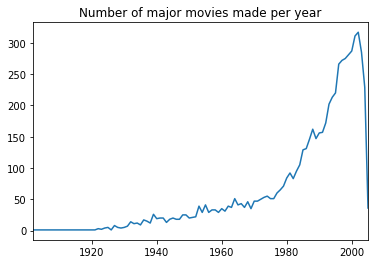

In [15]:
%matplotlib inline
# create the plot here
mm_yearly.sort_index().plot(title="Number of major movies made per year")

### Task 2.10: Yearly average

Compute the average rating per year for all major movies.  
Use the numbers you computed to plot a line chart. Plot the year on the x-axis and the average rating on th y axis.  

In [16]:
# your code goes here
rating_year = pd_majormovies[["year","rating"]]
rating_year.groupby("year").mean().head()

,rating
year,
1902,8.2
1903,7.4
1915,7.1
1916,7.8
1917,7.9


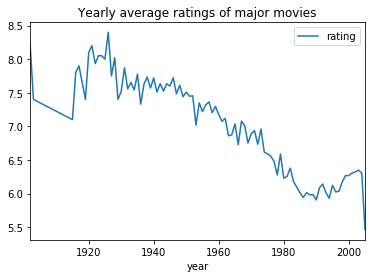

In [17]:
rating_year.groupby("year").mean().plot(title="Yearly average ratings of major movies")

### Task 2.11: Explore and Interpret

Are old movies better? How could you explain this? Are there differences between the rating of major movies and all movies over time? Continue to explore and use plots to inform your answer. Interesting measures to consider are the total number of votes per year, the average number of votes for a movie in a particular year, etc. 

**TODO: your code and your interpretation**  Please see below for the code and plots generated to inform my response to this question.  When looking at the plot above of yearly average ratings of major movies, there is a clear downward trend through time, leading us to believe that older movies might be better.  However, when plotting hte yearly average ratings of ALL movies, there is much more variability.  The oldest movies have the lowest ratings, then there is a spike in ratings from 1910-1930 before a very slow decrease in ratings until the year 2000, when there is another large spike.  

Why would there be so much variability?  Taking a look at the voting behavior over time, it is clear that the average number of votes in a year increased significantly overtime starting at a minimum yearly average of 13.2 around 1900 and increasing to 1365 votes around 2000.  With this substantial increase in voters as well as an increase in number of movies available over the years, it is possible that voters became more critical of movies as compared to the numerous movie options available. ???

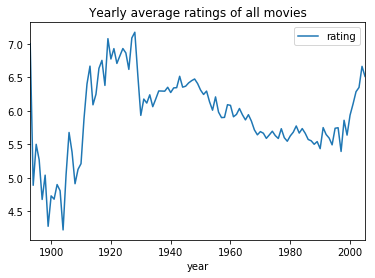

In [18]:
all_rating_year = pdmovies[["year","rating"]]
all_rating_year.groupby("year").mean().plot(title="Yearly average ratings of all movies")

# rating_year.groupby("year").mean().plot() & all_rating_year.groupby("year").mean()).plot()
# plt.plot

#pdmovies[["year", "rating"]].groupby("year").mean().plot()(title="Yearly average ratings of all movies")

In [30]:
annualvotes = pdmovies[["year","votes"]].groupby("year") #.plot(title="Total votes for all movies per year")
#annualvotes.plot(title="Total votes for all movies per year")
years = annualvotes["year"].tolist()

# mm_yearly = pd_majormovies["year"].value_counts() #.sort_values("year").head()
# mm_yearly.sort_index() #sorts by year, which is the index

AttributeError: Cannot access callable attribute 'tolist' of 'SeriesGroupBy' objects, try using the 'apply' method

In [20]:
pdmovies["votes"].describe()

count     58788.000000
mean        632.130384
std        3829.621413
min           5.000000
25%          11.000000
50%          30.000000
75%         112.000000
max      157608.000000
Name: votes, dtype: float64

In [21]:
pd_majormovies["votes"].describe()

count      6458.000000
mean       5263.632239
std       10457.498069
min         501.000000
25%         867.250000
50%        1813.000000
75%        5054.500000
max      157608.000000
Name: votes, dtype: float64

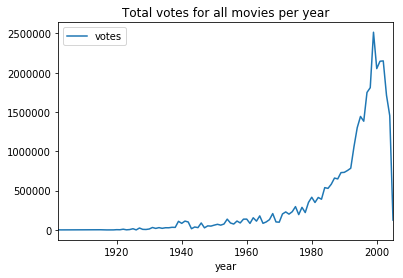

In [22]:
pd_majormovies[["year","votes"]].groupby("year").sum().plot(title="Total votes for all movies per year")

##NOT CORRECT

In [34]:
pdmovies[["year","votes"]].groupby("year").mean().describe()

,votes
count,113.000000
mean,339.887225
std,344.119145
min,13.208333
25%,89.247573
50%,218.824000
75%,427.526400
max,1364.969901


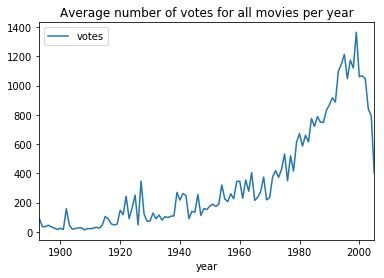

In [31]:
pdmovies[["year","votes"]].groupby("year").mean().plot(title="Average number of votes for all movies per year")